In [1]:
PATH = unicode('C:/Users/zero/Google 云端硬盘/useful tools/BGO', 'utf-8')
FILENAME = 'UTC %Y %m %d %H %M %S.csv'

In [2]:
from __future__ import division
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
import collections as co
import matplotlib as mpl
import operator as op
import datetime as dt
import numpy as np
import os

%config InlineBackend.figure_format='svg'
%matplotlib inline

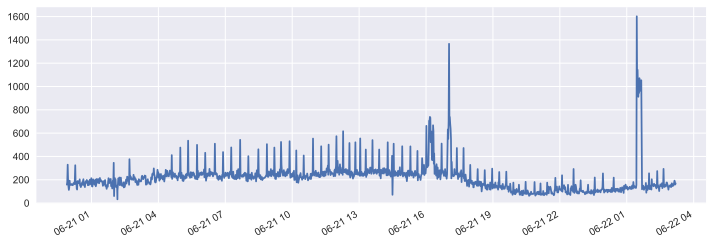

In [3]:
x, y = zip(*map(lambda utc: [dt.datetime.utcnow().strptime(utc, FILENAME),
                             min(pd.read_csv(os.path.join(PATH, utc))['id'])], os.listdir(PATH)))
plt.figure(figsize=(12,4))
plt.plot_date(mpl.dates.date2num(x[:-1]), np.subtract(y[1:], y[:-1]), ls='-', marker=None)
plt.gcf().autofmt_xdate()
plt.ylim(ymin=0)
plt.show()

In [4]:
fs = map(lambda fn: os.path.join(PATH, fn), os.listdir(PATH))
df = pd.concat(map(pd.read_csv, fs)).drop_duplicates().reset_index(drop=True)

In [5]:
for c in ['sname', 'star']:
    print 'Group by {}({})'.format(c, df.shape[0])
    for k, d in df.groupby(c):
        print '\t{:0=5.2f}%\t{:5}\t{}'.format(d.shape[0] / df.shape[0] * 100, d.shape[0], k)

Group by sname(48794)
	33.35%	16271	ios服
	64.81%	31625	安卓bili服
	01.84%	  898	安卓联运服
Group by star(48794)
	75.86%	37013	SR
	24.14%	11781	SSR


In [6]:
for c in ['star']:#['sname', 'star']:
    for k, d in df.groupby(c):
        print 'Group by {} = {}({})'.format(c, k, d.shape[0])
        d_ = dict(map(lambda (k, d): [k, d.shape[0]], d.groupby('info')))
        for k_ in sorted(d_, key=d_.get, reverse=True):
            print '\t{:0=5.2f}%\t{:5}\t{}'.format(d_[k_] / d.shape[0] * 100, d_[k_], k_)

Group by star = SR(37013)
	33.81%	12515	托马斯·爱迪生
	04.41%	 1634	骑士迪昂
	04.41%	 1631	赫拉克勒斯
	04.39%	 1625	玉藻猫
	04.38%	 1623	卡米拉
	04.38%	 1621	玛尔达
	04.34%	 1608	伊丽莎白·巴托里
	04.31%	 1595	斯忒诺
	04.26%	 1577	玛丽·安托瓦内特
	04.19%	 1549	卫宫
	04.04%	 1496	齐格飞
	02.17%	  802	卫宫〔Assassin〕
	02.10%	  778	芬恩·麦克库尔
	02.07%	  765	阿塔兰忒
	02.06%	  762	童谣
	02.04%	  754	弗兰肯斯坦
	01.97%	  728	贝奥武夫
	01.95%	  720	兰斯洛特
	01.91%	  708	罗摩
	01.89%	  700	安妮·伯妮＆玛莉·瑞德
	01.87%	  693	海伦娜·布拉瓦茨基
	01.86%	  690	阿斯托尔福
	00.46%	  172	阿尔托莉雅·潘德拉贡〔Alter〕
	00.25%	   94	尼禄·克劳狄乌斯
	00.24%	   87	美狄亚〔Lily〕
	00.23%	   86	李书文
Group by star = SSR(11781)
	61.45%	 7239	库·丘林[Alter]
	03.22%	  379	俄里翁
	03.10%	  365	迦尔纳
	03.07%	  362	南丁格尔
	03.05%	  359	莫德雷德
	03.00%	  354	玉藻前
	02.98%	  351	弗拉德三世
	02.84%	  335	阿蒂拉
	02.84%	  335	阿周那
	02.79%	  329	开膛手杰克
	02.75%	  324	弗朗西斯·德雷克
	02.74%	  323	贞德
	02.56%	  302	诸葛孔明〔埃尔梅罗Ⅱ世〕
	02.52%	  297	阿尔托莉雅·潘德拉贡
	00.65%	   76	尼古拉·特斯拉
	00.43%	   51	女王梅芙


In [7]:
s2cs = dict(map(lambda s: [s, df[df['star'] == s]['info'].unique().tolist()], ['SR', 'SSR']))
c2s = dict(reduce(op.add, map(lambda s: zip(s2cs[s], [s] * len(s2cs[s])), s2cs)))
i2c = c2s.keys()
c2i = dict(zip(i2c, range(len(i2c))))
i2s = np.array(map(c2s.get, i2c))
STAR_RATE = {
    'SR': 3,
    'SSR': 1
}
UP_RATE = {
    'SR': .65,
    'SSR': .65
}
INIT_TEN_CARD = ['骑士迪昂', '玉藻猫', '玛尔达', '赫拉克勒斯', '伊丽莎白·巴托里',
                 '斯忒诺', '卡米拉', '玛丽·安托瓦内特', '卫宫', '齐格飞']
BASIC_POOL_CARD = INIT_TEN_CARD + ['阿塔兰忒', '安妮·伯妮＆玛莉·瑞德', '阿斯托尔福', '弗兰肯斯坦', '童谣',
                   '贝奥武夫', '芬恩·麦克库尔', '兰斯洛特', '卫宫〔Assassin〕', '罗摩',
                   '海伦娜·布拉瓦茨基',
                   '南丁格尔', '弗朗西斯·德雷克', '俄里翁', '莫德雷德', '迦尔纳',
                   '玉藻前', '贞德', '弗拉德三世', '阿尔托莉雅·潘德拉贡', '阿蒂拉',
                   '阿周那', '诸葛孔明〔埃尔梅罗Ⅱ世〕', '开膛手杰克']
UP_POOL_CARD = ['库·丘林[Alter]', '托马斯·爱迪生']
s2n_ = co.Counter(map(c2s.get, UP_POOL_CARD))
POOL_NAME, POOL_CARD = map(list, zip(*[['初始十连', INIT_TEN_CARD],
                                       ['UP池', BASIC_POOL_CARD + UP_POOL_CARD],
                                       ['-1章剧情池', BASIC_POOL_CARD]]))
for pn, pc in [['0~1章剧情池', ['阿尔托莉雅·潘德拉贡〔Alter〕']], ['2章剧情池', ['尼禄·克劳狄乌斯']],
               ['3章剧情池', ['美狄亚〔Lily〕']], ['4章剧情池', ['尼古拉·特斯拉', '阿尔托莉雅·潘德拉贡〔Alter〕']],
               ['5~章剧情池', ['库·丘林[Alter]', '女王梅芙', '托马斯·爱迪生', '李书文']]]:
    POOL_NAME.append(pn)
    POOL_CARD.append(POOL_CARD[-1] + pc)
pn2i = dict(zip(POOL_NAME, range(len(POOL_NAME))))
alpha = np.zeros(map(len, [pn2i, c2i]))
for i in range(len(POOL_NAME)):
    s2n = co.Counter(map(c2s.get, POOL_CARD[i]))
    for c in POOL_CARD[i]:
        if POOL_NAME[i] != 'UP池':
            alpha[i, c2i[c]] += STAR_RATE[c2s[c]] / s2n[c2s[c]]
        elif c in UP_POOL_CARD:
            alpha[i, c2i[c]] += STAR_RATE[c2s[c]] / s2n_[c2s[c]] * UP_RATE[c2s[c]]
        else:
            alpha[i, c2i[c]] += STAR_RATE[c2s[c]] / (s2n[c2s[c]] - s2n_[c2s[c]]) * (1 - UP_RATE[c2s[c]])
    alpha[i] /= min(alpha[i, alpha[i] != 0])

In [8]:
prior = reduce(pd.merge, map(lambda pn: pd.DataFrame(dict(zip(
    ['info', pn], zip(*map(lambda c: [c, alpha[pn2i[pn], c2i[c]] / sum(alpha[pn2i[pn], :])], i2c))))), POOL_NAME))
prior

,info,初始十连,UP池,-1章剧情池,0~1章剧情池,2章剧情池,3章剧情池,4章剧情池,5~章剧情池
0,赫拉克勒斯,0.1,0.012500,0.035714,0.034091,0.032609,0.031250,0.030000,0.027778
1,库·丘林[Alter],0.0,0.162500,0.000000,0.000000,0.000000,0.000000,0.000000,0.015625
2,童谣,0.0,0.012500,0.035714,0.034091,0.032609,0.031250,0.030000,0.027778
3,齐格飞,0.1,0.012500,0.035714,0.034091,0.032609,0.031250,0.030000,0.027778
4,伊丽莎白·巴托里,0.1,0.012500,0.035714,0.034091,0.032609,0.031250,0.030000,0.027778
5,李书文,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778
6,阿塔兰忒,0.0,0.012500,0.035714,0.034091,0.032609,0.031250,0.030000,0.027778
7,阿蒂拉,0.0,0.006731,0.019231,0.019231,0.019231,0.019231,0.017857,0.015625
8,阿斯托尔福,0.0,0.012500,0.035714,0.034091,0.032609,0.031250,0.030000,0.027778
9,弗兰肯斯坦,0.0,0.012500,0.035714,0.034091,0.032609,0.031250,0.030000,0.027778


In [9]:
%%time
def CGS(n, alpha, beta, cnt):
    np.random.seed(0)
    thetas, pis = [], []
    da, db = 0, 0
    for _ in range(n):
        thetas.append(np.array(map(np.random.dirichlet, alpha + da)))
        pis.append(np.random.dirichlet(beta + db))
        da = (thetas[-1].T * pis[-1]).T
        da *= cnt / da.sum(axis=0)
        db = da.sum(axis=1)
    return thetas, pis
thetas, pis = CGS(100000, alpha, np.ones(len(POOL_NAME)), zip(*sorted(co.Counter(map(c2i.get, df['info'])).iteritems()))[1])

Wall time: 10.4 s


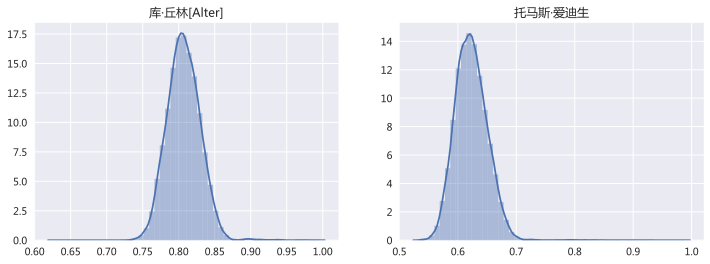

In [10]:
mpl.rc('font', family='Microsoft YaHei')
plt.figure(figsize=(12, 4))
for c in UP_POOL_CARD:
    plt.subplot(1, 2, UP_POOL_CARD.index(c) + 1)
    plt.title(u'{}'.format(unicode(c, 'utf-8')))
    sb.distplot(map(lambda t: t[pn2i['UP池'], c2i[c]] / sum(t[pn2i['UP池'], i2s == c2s[c]]), thetas))
plt.show()

In [11]:
theta, pi = map(lambda v: np.mean(v[-1000:], axis=0), [thetas, pis])

In [12]:
posterior = reduce(pd.merge, map(lambda pn: pd.DataFrame(dict(zip(['info', pn],
                                                                  zip(*map(lambda c: [c, theta[pn2i[pn], c2i[c]]], i2c))))), POOL_NAME))
reduce(pd.merge, map(lambda pn: pd.DataFrame(dict(zip(['info', '{}({:.2f}%)'.format(pn, pi[pn2i[pn]] * 100)],
                                                      zip(*map(lambda c: [c, theta[pn2i[pn], c2i[c]]], i2c))))), POOL_NAME))

,info,初始十连(18.72%),UP池(59.77%),-1章剧情池(2.44%),0~1章剧情池(6.79%),2章剧情池(4.34%),3章剧情池(2.22%),4章剧情池(0.84%),5~章剧情池(4.89%)
0,赫拉克勒斯,0.106786,0.010663,0.037130,0.036458,0.029770,0.031913,0.032200,0.025907
1,库·丘林[Alter],0.000000,0.246238,0.000000,0.000000,0.000000,0.000000,0.000000,0.021605
2,童谣,0.000000,0.013637,0.039628,0.039125,0.032875,0.027830,0.029922,0.031885
3,齐格飞,0.100611,0.008698,0.031562,0.033584,0.032622,0.030306,0.029957,0.022055
4,伊丽莎白·巴托里,0.102866,0.011634,0.036032,0.035441,0.031173,0.029022,0.029310,0.028689
5,李书文,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036814
6,阿塔兰忒,0.000000,0.012540,0.031721,0.048568,0.038264,0.032019,0.028391,0.026914
7,阿蒂拉,0.000000,0.004962,0.018499,0.022217,0.016966,0.021588,0.016350,0.012331
8,阿斯托尔福,0.000000,0.011779,0.032917,0.039764,0.036408,0.033147,0.031498,0.021776
9,弗兰肯斯坦,0.000000,0.013978,0.038977,0.037621,0.031210,0.038171,0.031572,0.024303


posterior.set_index('info') / prior.set_index('info') - 1